In [1]:
# lib for extraction ,manipulation,analysis
import numpy as np
import pandas as pd
# for visualtion
import matplotlib.pyplot as plt
import seaborn as sns
# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
# train test split
from sklearn.model_selection import train_test_split

# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
# for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# regression evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# importing dataset
data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\Python\loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
# Remove spaces from column names
data.columns = data.columns.str.replace(" ", "")
print("\nUpdated column names:")
print(data.columns)


Updated column names:
Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [4]:
#EDA for each data analysis
def eda(data):
    print("Shape:",data.shape)
    print("- "*50)
    print("Size:",data.size)
    print("- "*50)
    print("INFO:",data.info)
    print("- "*50)
    print("Describe:",data.describe())
    print("- "*50)
    print("Dtype:",data.dtypes)
    print("* "*50)
    print("Checking Null Values:",data.isnull().sum())

eda(data)

Shape: (4269, 13)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Size: 55497
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INFO: <bound method DataFrame.info of       loan_id  no_of_dependents      education self_employed  income_annum  \
0           1                 2       Graduate            No       9600000   
1           2                 0   Not Graduate           Yes       4100000   
2           3                 3       Graduate            No       9100000   
3           4                 3       Graduate            No       8200000   
4           5                 5   Not Graduate           Yes       9800000   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes       1000000   
4265     4266                 0   Not Graduate           Yes       3300000   
4266     4267               

In [5]:
# Analysis for Numerical Columns
def Num_col(data, col):
    mean=data[col].mean()
    median=data[col].median()
    mode=data[col].mode()[0]
    var =data[col].var()
    std=data[col].std()
    skew=data[col].skew()
    Min=data[col].min()
    Max=data[col].max()
    Range=Max-Min
    print("Numerical Columns Analysis:")
    print(f"mean:{mean}\nmedian:{median}\nmode:{mode}\nvar:{var}\nstd:{std}\nskew:{skew}\nMIN:{Min}\nMAAX:{Max}\nRange:{Range}")


In [6]:
data.drop(columns=["loan_id"],inplace=True)

In [7]:
 Num_col(data,"no_of_dependents")

Numerical Columns Analysis:
mean:2.4987116420707425
median:3.0
mode:4
var:2.876111273203152
std:1.695910160711101
skew:-0.01797054296784964
MIN:0
MAAX:5
Range:5


<Axes: xlabel='no_of_dependents', ylabel='Count'>

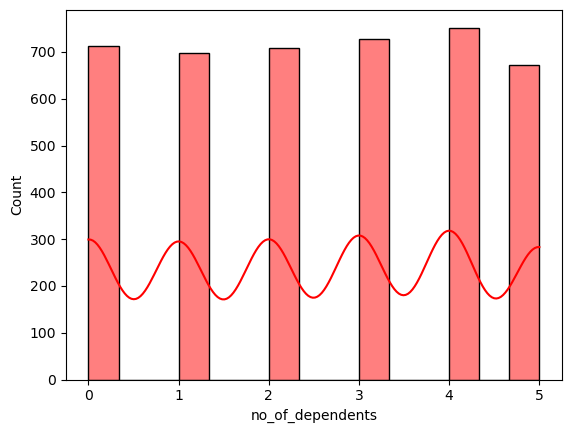

In [8]:
sns.histplot(data=data,x="no_of_dependents",bins=15,kde=True,color="red")

In [9]:
 Num_col(data,"income_annum")

Numerical Columns Analysis:
mean:5059123.9166081045
median:5100000.0
mode:7000000
var:7878349841482.69
std:2806839.831818462
skew:-0.012814425096650109
MIN:200000
MAAX:9900000
Range:9700000


<Axes: xlabel='income_annum', ylabel='Count'>

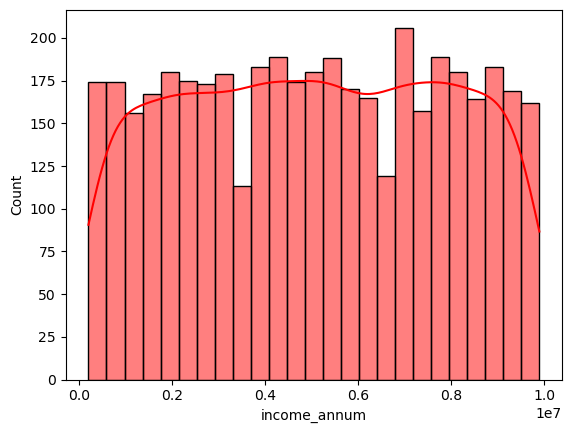

In [10]:
sns.histplot(data=data,x="income_annum",bins=25,kde=True,color="red")

In [11]:
Num_col(data,"loan_amount")

Numerical Columns Analysis:
mean:15133450.456781447
median:14500000.0
mode:10600000
var:81782414075625.84
std:9043362.984842854
skew:0.30872388482299223
MIN:300000
MAAX:39500000
Range:39200000


<Axes: xlabel='loan_amount', ylabel='Count'>

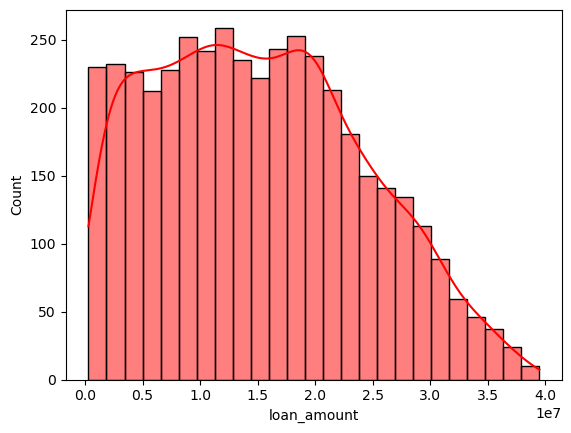

In [12]:
sns.histplot(data=data,x="loan_amount",bins=25,kde=True,color="red")

In [13]:
data.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [14]:
Num_col(data,"loan_term")

Numerical Columns Analysis:
mean:10.900445069102835
median:10.0
mode:6
var:32.594819389495214
std:5.7091872792452
skew:0.036358907356478495
MIN:2
MAAX:20
Range:18


<Axes: xlabel='loan_term', ylabel='Count'>

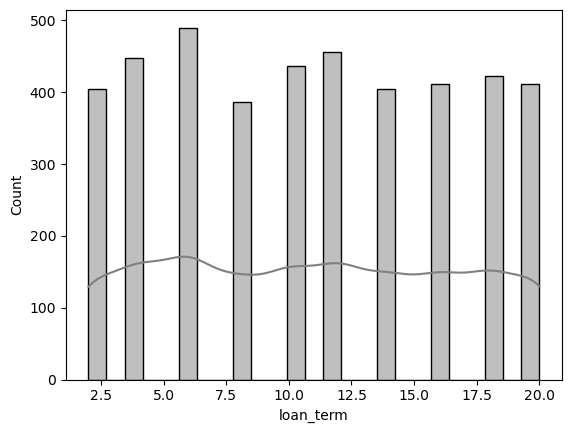

In [15]:
sns.histplot(data=data,x="loan_term",bins=25,kde=True,color="grey")

In [16]:
Num_col(data,"cibil_score")

Numerical Columns Analysis:
mean:599.9360505973295
median:600.0
mode:348
var:29732.243097894454
std:172.43040073575904
skew:-0.009039277330065707
MIN:300
MAAX:900
Range:600


<Axes: xlabel='cibil_score', ylabel='Count'>

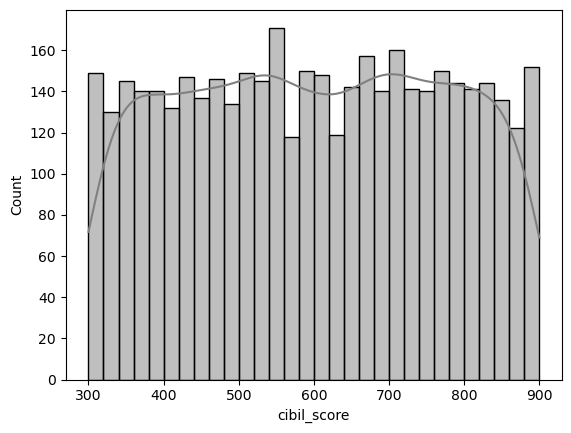

In [17]:
sns.histplot(data=data,x="cibil_score",bins=30,kde=True,color="grey")

In [18]:
Num_col(data,"residential_assets_value")

Numerical Columns Analysis:
mean:7472616.537830873
median:5600000.0
mode:400000
var:42297288864403.16
std:6503636.587664101
skew:0.9784505965115631
MIN:-100000
MAAX:29100000
Range:29200000


<Axes: xlabel='residential_assets_value', ylabel='Count'>

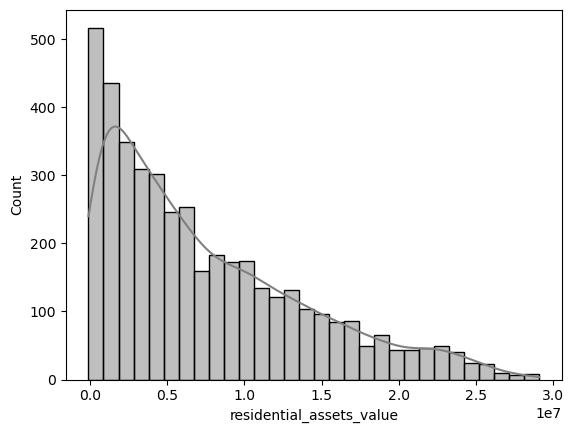

In [19]:
sns.histplot(data=data,x="residential_assets_value",bins=30,kde=True,color="grey")

In [20]:
Num_col(data,"commercial_assets_value")

Numerical Columns Analysis:
mean:4973155.3056922
median:3700000.0
mode:0
var:19263023335996.324
std:4388966.089638461
skew:0.9577908874986114
MIN:0
MAAX:19400000
Range:19400000


<Axes: xlabel='commercial_assets_value', ylabel='Count'>

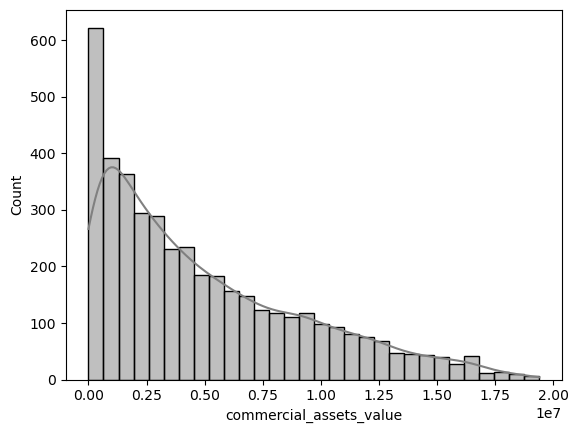

In [21]:
sns.histplot(data=data,x="commercial_assets_value",bins=30,kde=True,color="grey")

In [22]:
Num_col(data,"luxury_assets_value")

Numerical Columns Analysis:
mean:15126305.926446475
median:14600000.0
mode:2900000
var:82878330797671.08
std:9103753.665256497
skew:0.3222075028955774
MIN:300000
MAAX:39200000
Range:38900000


<Axes: xlabel='luxury_assets_value', ylabel='Count'>

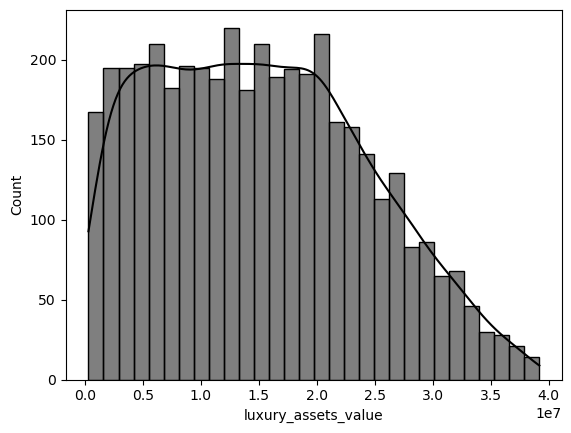

In [23]:
sns.histplot(data=data,x="luxury_assets_value",bins=30,kde=True,color="black")

In [24]:
Num_col(data,"bank_asset_value")

Numerical Columns Analysis:
mean:4976692.433825252
median:4600000.0
mode:1400000
var:10563704521360.266
std:3250185.3056957023
skew:0.5607250089736816
MIN:0
MAAX:14700000
Range:14700000


<Axes: xlabel='bank_asset_value', ylabel='Count'>

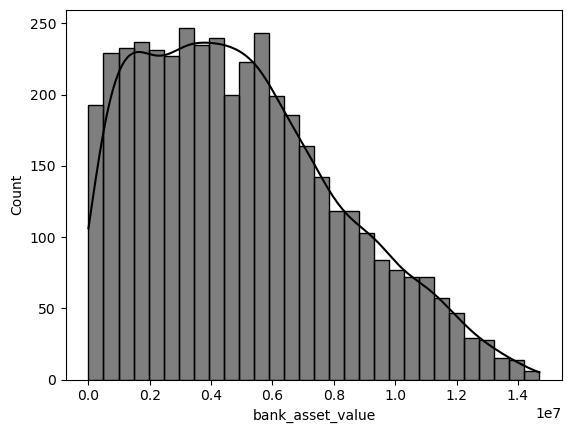

In [25]:
sns.histplot(data=data,x="bank_asset_value",bins=30,kde=True,color="black")

In [26]:
# checking and handling of outliers

def Checking_and_Handling_Of_Outliers(data, col):
    sns.boxplot(data[col], color = "Red")
    plt.title(f"Boxplot for {col}")
    plt.show()
        
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3 - q1

    LowerTail = q1 - 1.5*iqr
    UpperTail = q3 + 1.5*iqr

    print(f"25% Quantile q1 = {q1}\n75% Quantile q3 = {q3}\nIQR = {iqr}\n")
    print("-"*80)
    print(f"Lower Tail = {LowerTail}\nUpper Tail = {UpperTail}")
    print("-"*80)

    # Checking for Outliers
    Outliers = data[(data[col] < LowerTail) | (data[col] > UpperTail)]
    print("\nOutliers :\n",Outliers)
    print("-"*80)
#HAndling of Outliers :
    data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value
    data.loc[data[col] > UpperTail, col] = UpperTail # all outliers greater than uppertail, assigned by uppertail value

    print("After handling of Outliers data:\n")
    print(data.head())

In [27]:
data.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

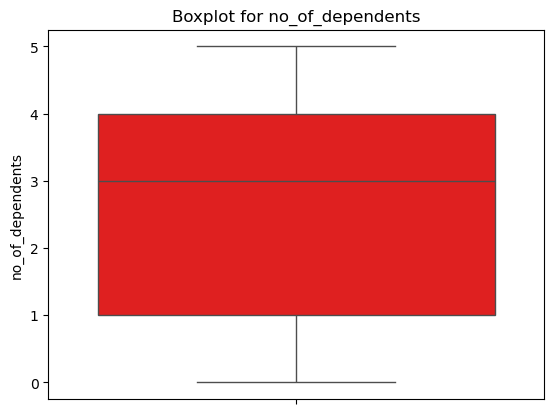

25% Quantile q1 = 1.0
75% Quantile q3 = 4.0
IQR = 3.0

--------------------------------------------------------------------------------
Lower Tail = -3.5
Upper Tail = 8.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0               2.0       Graduate            No       9600000     29900000   
1               0.0   Not Graduate           Yes       4100000     12200000   
2               3.0       Graduate            No       9100000     29700000   
3               3.0       Graduate            No       8200000     307

C:\Users\deshm\AppData\Local\Temp\ipykernel_12040\3306476731.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [28]:
Checking_and_Handling_Of_Outliers(data, "no_of_dependents")

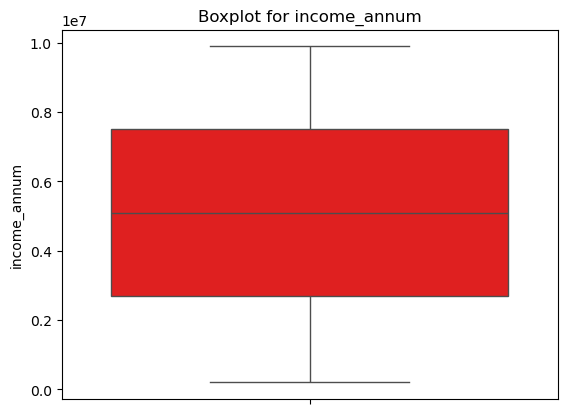

25% Quantile q1 = 2700000.0
75% Quantile q3 = 7500000.0
IQR = 4800000.0

--------------------------------------------------------------------------------
Lower Tail = -4500000.0
Upper Tail = 14700000.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0               2.0       Graduate            No       9600000     29900000   
1               0.0   Not Graduate           Yes       4100000     12200000   
2               3.0       Graduate            No       9100000     29700000   
3               3.0       Graduate     

In [29]:
Checking_and_Handling_Of_Outliers(data, "income_annum")

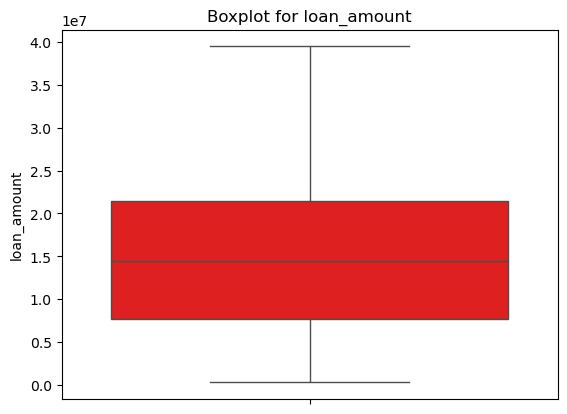

25% Quantile q1 = 7700000.0
75% Quantile q3 = 21500000.0
IQR = 13800000.0

--------------------------------------------------------------------------------
Lower Tail = -13000000.0
Upper Tail = 42200000.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0               2.0       Graduate            No       9600000     29900000   
1               0.0   Not Graduate           Yes       4100000     12200000   
2               3.0       Graduate            No       9100000     29700000   
3               3.0       Graduate  

In [30]:
Checking_and_Handling_Of_Outliers(data, "loan_amount")

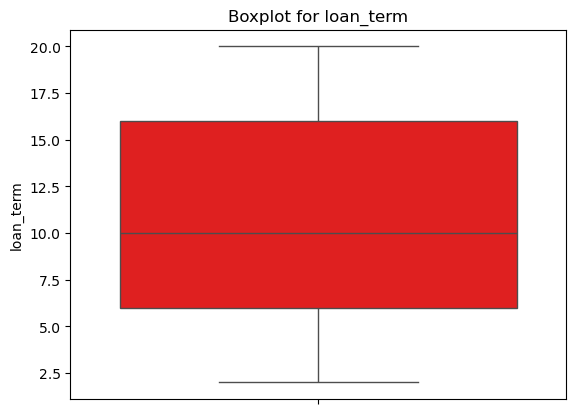

25% Quantile q1 = 6.0
75% Quantile q3 = 16.0
IQR = 10.0

--------------------------------------------------------------------------------
Lower Tail = -9.0
Upper Tail = 31.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0               2.0       Graduate            No       9600000     29900000   
1               0.0   Not Graduate           Yes       4100000     12200000   
2               3.0       Graduate            No       9100000     29700000   
3               3.0       Graduate            No       8200000     

In [31]:
Checking_and_Handling_Of_Outliers(data, "loan_term")

In [32]:
data.dtypes

no_of_dependents            float64
education                    object
self_employed                object
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                   int64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
loan_status                  object
dtype: object

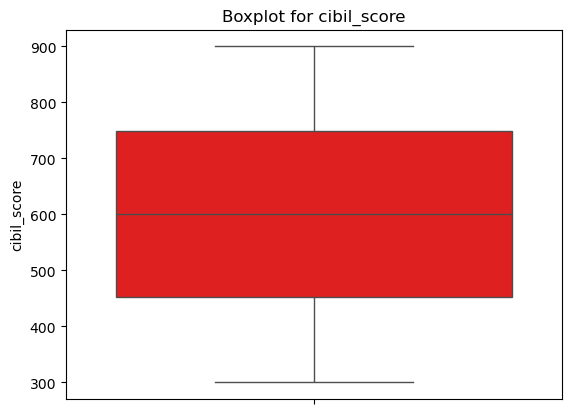

25% Quantile q1 = 453.0
75% Quantile q3 = 748.0
IQR = 295.0

--------------------------------------------------------------------------------
Lower Tail = 10.5
Upper Tail = 1190.5
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0               2.0       Graduate            No       9600000     29900000   
1               0.0   Not Graduate           Yes       4100000     12200000   
2               3.0       Graduate            No       9100000     29700000   
3               3.0       Graduate            No       820000

C:\Users\deshm\AppData\Local\Temp\ipykernel_12040\3306476731.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] < LowerTail, col] = LowerTail # all outliers less than lowertail, assigned by lowertail value


In [33]:
Checking_and_Handling_Of_Outliers(data, "cibil_score")

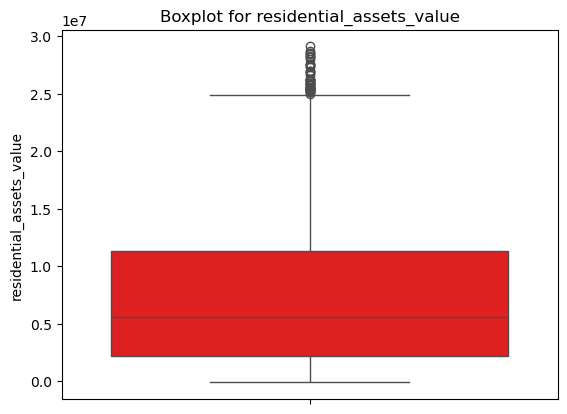

25% Quantile q1 = 2200000.0
75% Quantile q3 = 11300000.0
IQR = 9100000.0

--------------------------------------------------------------------------------
Lower Tail = -11450000.0
Upper Tail = 24950000.0
--------------------------------------------------------------------------------

Outliers :
       no_of_dependents      education self_employed  income_annum  \
82                 2.0   Not Graduate           Yes       9900000   
98                 4.0       Graduate            No       9400000   
123                0.0   Not Graduate           Yes       9000000   
228                1.0   Not Graduate           Yes       8700000   
262                3.0       Graduate            No       9200000   
693                0.0       Graduate            No       9200000   
714                4.0   Not Graduate            No       9900000   
781                3.0   Not Graduate           Yes       9900000   
892                4.0       Graduate            No       9300000   
905         

In [34]:
Checking_and_Handling_Of_Outliers(data, "residential_assets_value")

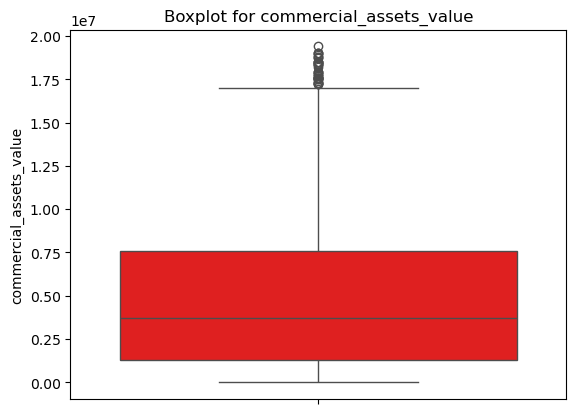

25% Quantile q1 = 1300000.0
75% Quantile q3 = 7600000.0
IQR = 6300000.0

--------------------------------------------------------------------------------
Lower Tail = -8150000.0
Upper Tail = 17050000.0
--------------------------------------------------------------------------------

Outliers :
       no_of_dependents      education self_employed  income_annum  \
0                  2.0       Graduate            No       9600000   
157                5.0   Not Graduate           Yes       9900000   
231                2.0       Graduate            No       9800000   
258                0.0       Graduate            No       9800000   
323                3.0   Not Graduate           Yes       9500000   
367                1.0   Not Graduate           Yes       9400000   
554                3.0   Not Graduate           Yes       9500000   
791                4.0       Graduate           Yes       9300000   
895                0.0       Graduate            No       9400000   
905           

In [35]:
Checking_and_Handling_Of_Outliers(data, "commercial_assets_value")

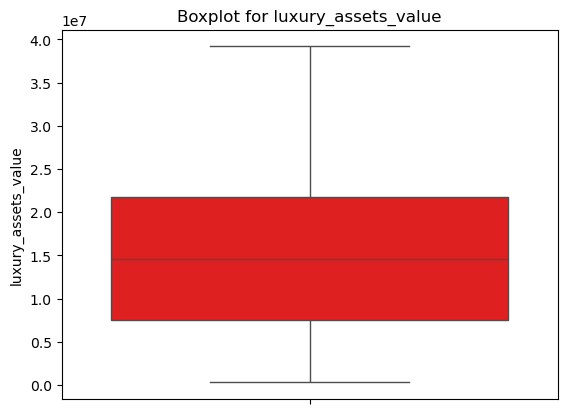

25% Quantile q1 = 7500000.0
75% Quantile q3 = 21700000.0
IQR = 14200000.0

--------------------------------------------------------------------------------
Lower Tail = -13800000.0
Upper Tail = 43000000.0
--------------------------------------------------------------------------------

Outliers :
 Empty DataFrame
Columns: [no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value, loan_status]
Index: []
--------------------------------------------------------------------------------
After handling of Outliers data:

   no_of_dependents      education self_employed  income_annum  loan_amount  \
0               2.0       Graduate            No       9600000     29900000   
1               0.0   Not Graduate           Yes       4100000     12200000   
2               3.0       Graduate            No       9100000     29700000   
3               3.0       Graduate  

In [36]:
Checking_and_Handling_Of_Outliers(data, "luxury_assets_value")

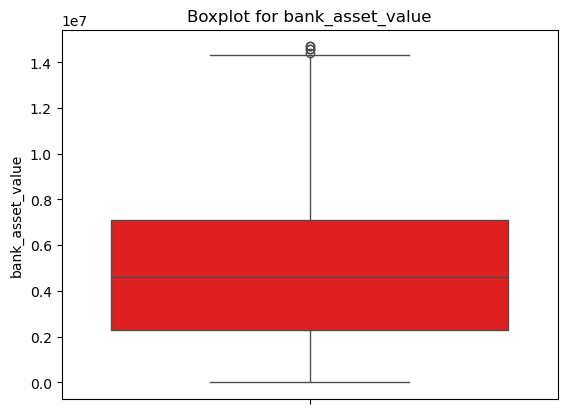

25% Quantile q1 = 2300000.0
75% Quantile q3 = 7100000.0
IQR = 4800000.0

--------------------------------------------------------------------------------
Lower Tail = -4900000.0
Upper Tail = 14300000.0
--------------------------------------------------------------------------------

Outliers :
       no_of_dependents      education self_employed  income_annum  \
200                4.0   Not Graduate           Yes       9800000   
1272               5.0   Not Graduate            No       9900000   
1633               0.0       Graduate           Yes       9800000   
1674               1.0   Not Graduate            No       9800000   
1805               5.0   Not Graduate            No       9900000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
200      21200000         20        355.0                  22000000   
1272     35800000         20        470.0                   9500000   
1633     23200000         10        573.0                  23900000   
1674 

In [37]:
Checking_and_Handling_Of_Outliers(data, "bank_asset_value")

In [38]:
# Analysis of Categorical Columns(Variable)
def Cat_col(data, col):
    unique_values = data[col].unique()  # Fixed typo: renamed to unique_values
    value_counts = data[col].value_counts()
    mode = data[col].mode()[0]  # Fixed mode access by adding parentheses

    # Enhanced string formatting for clarity
    print(f"Unique Values in '{col}':\n{unique_values}\n")
    print(f"Value Counts in '{col}':\n{value_counts}\n")
    print(f"Mode of '{col}': {mode}\n")


    data[col].value_counts().plot.pie(autopct="%1.1f%%")
    plt.title(f"data-{col} (pie chart)")
    plt.show

In [39]:
data.dtypes

no_of_dependents            float64
education                    object
self_employed                object
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                 float64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
loan_status                  object
dtype: object

Unique Values in 'education':
[' Graduate' ' Not Graduate']

Value Counts in 'education':
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

Mode of 'education':  Graduate



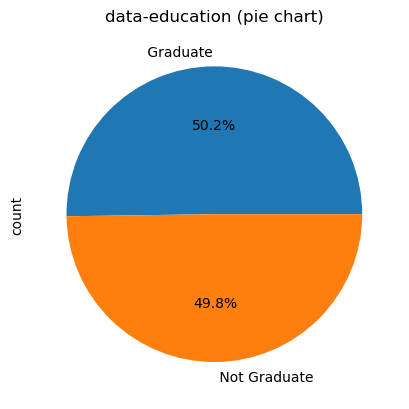

In [40]:
Cat_col(data,"education")

Unique Values in 'self_employed':
[' No' ' Yes']

Value Counts in 'self_employed':
self_employed
Yes    2150
No     2119
Name: count, dtype: int64

Mode of 'self_employed':  Yes



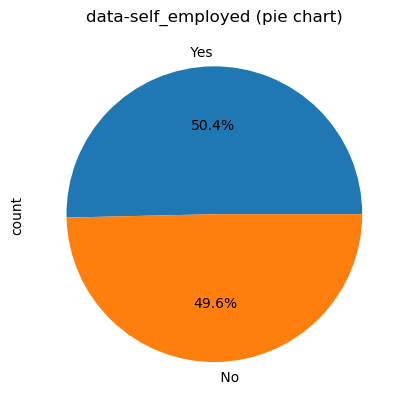

In [41]:
Cat_col(data,"self_employed")

Unique Values in 'loan_status':
[' Approved' ' Rejected']

Value Counts in 'loan_status':
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Mode of 'loan_status':  Approved



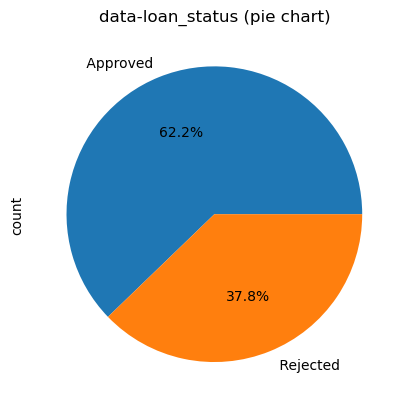

In [42]:
Cat_col(data,"loan_status")

In [43]:
# Bivariate analysis of columns
def bivariate_violin_plot(data, categorical_col, numerical_col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")
    plt.title(f'Violin Plot: {numerical_col} by {categorical_col}', fontsize=16)
    plt.xlabel(categorical_col, fontsize=12)
    plt.ylabel(numerical_col, fontsize=12)
    plt.show()

C:\Users\deshm\AppData\Local\Temp\ipykernel_12040\3825122554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=categorical_col, y=numerical_col, data=data, palette="muted", inner="quartile")


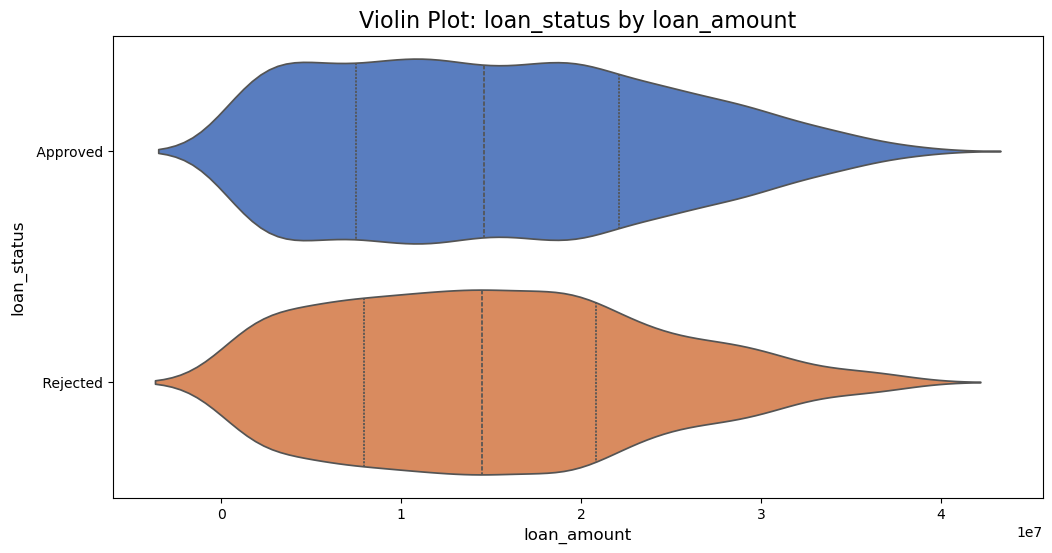

In [44]:
bivariate_violin_plot(data,"loan_amount" ,"loan_status")

## Encoding

In [46]:
data.dtypes

no_of_dependents            float64
education                    object
self_employed                object
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                 float64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
loan_status                  object
dtype: object

In [47]:
data["education"].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [48]:
data["education_encoded"]=data["education"].replace({'Graduate':0, 'Not Graduate':1})

In [49]:
data["self_employed"].unique()

array([' No', ' Yes'], dtype=object)

In [50]:
data["self_employed_encoded"]=data["self_employed"].replace({'No':0, 'Yes':1})

In [51]:
data["loan_status"].unique()

array([' Approved', ' Rejected'], dtype=object)

In [52]:
data["loan_status_encoded"]=data["loan_status"].replace({'Approved':0, 'Rejected':1})

In [53]:
data.dtypes

no_of_dependents            float64
education                    object
self_employed                object
income_annum                  int64
loan_amount                   int64
loan_term                     int64
cibil_score                 float64
residential_assets_value      int64
commercial_assets_value       int64
luxury_assets_value           int64
bank_asset_value              int64
loan_status                  object
education_encoded            object
self_employed_encoded        object
loan_status_encoded          object
dtype: object

In [54]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_encoded,self_employed_encoded,loan_status_encoded
0,2.0,Graduate,No,9600000,29900000,12,778.0,2400000,17050000,22700000,8000000,Approved,Graduate,No,Approved
1,0.0,Not Graduate,Yes,4100000,12200000,8,417.0,2700000,2200000,8800000,3300000,Rejected,Not Graduate,Yes,Rejected
2,3.0,Graduate,No,9100000,29700000,20,506.0,7100000,4500000,33300000,12800000,Rejected,Graduate,No,Rejected
3,3.0,Graduate,No,8200000,30700000,8,467.0,18200000,3300000,23300000,7900000,Rejected,Graduate,No,Rejected
4,5.0,Not Graduate,Yes,9800000,24200000,20,382.0,12400000,8200000,29400000,5000000,Rejected,Not Graduate,Yes,Rejected


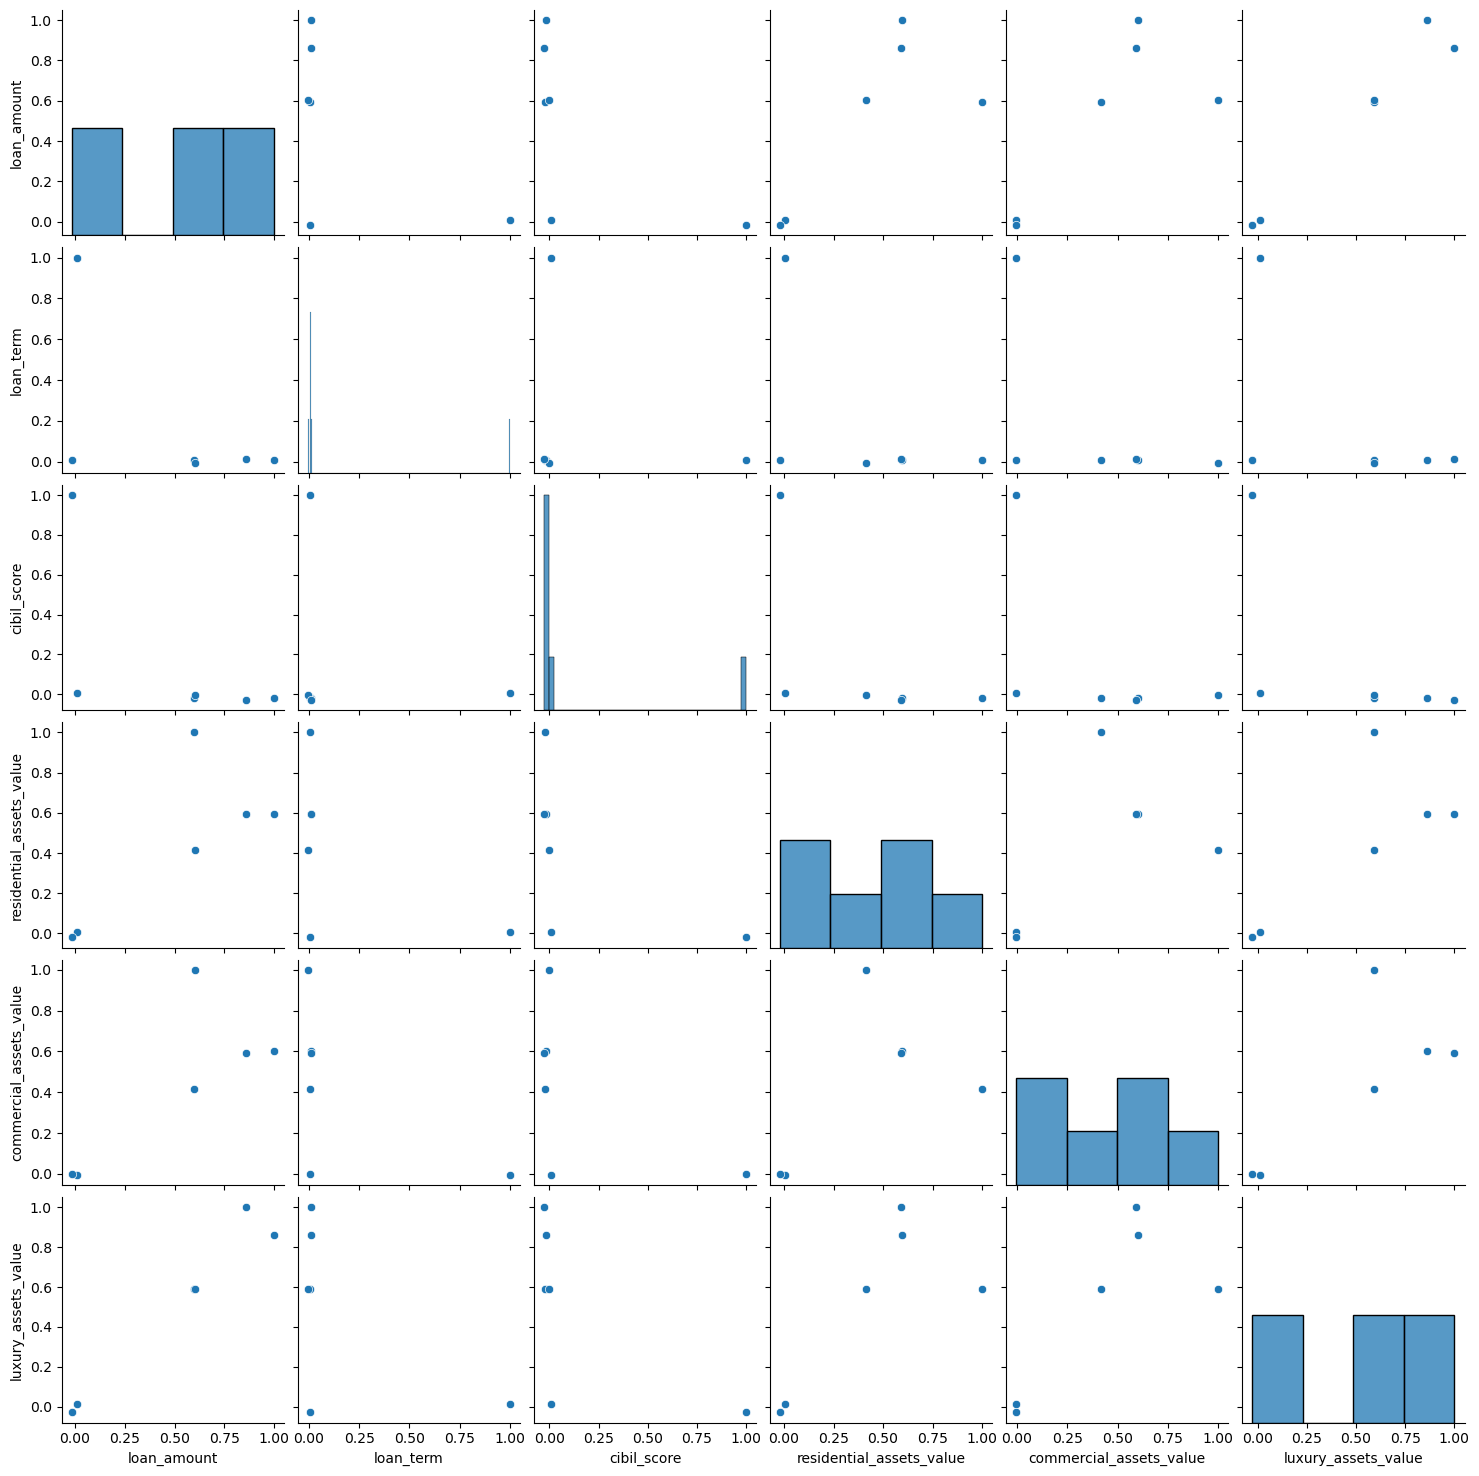

In [63]:
corr=data.iloc[:,4:10].corr()
sns.pairplot(corr)

In [ ]:
sns.heatmap(corr)

## 2. No multicolinearity/ Independance

In [ ]:
# Take a dataframe for independent columns 
df = data.iloc[:, :11]
df

In [ ]:
VIF_df = pd.DataFrame()

VIF_df["Independant Columns"] = df.columns

VIF_df

In [ ]:
a= df.shape[1]
a

In [ ]:
vif_list = []

for i in range(a):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)

VIF_df["VIF"] = vif_list

VIF_df

In [ ]:
# Create a loan-to-income ratio
df['loan_to_income_ratio'] = df["loan_amount"] / df["income_annum"]


In [ ]:
df.drop(columns=["loan_amount"])
df.drop(columns=["income_annum"])

In [ ]:
df = data.iloc[:, :10]
df

In [ ]:
VIF_df = pd.DataFrame()

VIF_df["Independant Columns"] = df.columns

VIF_df

In [ ]:
a= df.shape[1]
a

In [ ]:
vif_list = []

for i in range(a):
    vif = variance_inflation_factor(df.to_numpy(), i)
    vif_list.append(vif)

VIF_df["VIF"] = vif_list

VIF_df

In [ ]:
# Train-test split

X = data.drop(columns=['loan_status'])  # Replace 'target_column' with your target variable
Y = data['loan_status']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f'Shape of X_train: {xtrain.shape}')
print(f'Shape of X_test: {xtest.shape}')
print(f'Shape of y_train: {ytrain.shape}')
print(f'Shape of y_test: {ytest.shape}')

## Model Training

In [ ]:
logistic_reg=LogisticRegression()
logistic_reg


In [ ]:
logistic_reg_model=logistic_reg.fit(xtrain,ytrain)

## Evaluation of LR

## Evalution on training data

In [ ]:
ytrain_predict = logistic_reg_model.predict(xtrain)

In [ ]:
accuracy = accuracy_score(ytrain,ytrain_predict)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytrain,ytrain_predict)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytrain,ytrain_predict)
print(f"Classification report : \n{clss_report}")
print("*"*60)

In [ ]:
## Evalution on testing data
ytest_pred = logistic_reg_model.predict(xtest)

In [ ]:

accuracy = accuracy_score(ytest,ytest_pred)
print(f"Accuracy Score = {accuracy}")
print("*"*60)

con_mat = multilabel_confusion_matrix(ytest,ytest_pred)
print(f"Confusion Matrix : \n{con_mat}")
print("*"*60)

clss_report = classification_report(ytest,ytest_pred)
print(f"Classification report : \n{clss_report}")
print("*"*60)

## Save model in pickle file

In [ ]:
import pickle


In [ ]:
with open("loanmodel.pkl","wb") as f:
    pickle.dump(logistic_reg_model,f)

In [ ]:
with open("loanmodel.pkl","rb") as f:
    model = pickle.load(f)

In [ ]:
df.columns

In [ ]:
def Prediction( no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value):
    test_data = {
         "no_of_dependents": [no_of_dependents],
         "education": [education],
         "self_employed":[self_employed],
         "income_annum": [income_annum],
         "loan_amount":[loan_amount],
         "loan_term": [loan_term],
         "cibil_score": [cibil_score],
         "residential_assets_value":[residential_assets_value],
         "commercial_assets_value": [commercial_assets_value],
         "luxury_assets_value":[luxury_assets_value] }  
     # Load the trained model
    with open("loanmodel.pkl", "rb") as f:
        final_model = pickle.load(f)

    # Predict charges
    predicted_loan_status = final_model.predict(data)[0]
    print(f"Predicted loan_status =  {predicted_loan_status:.2f}")
    #test_df = pd.DataFrame(test_data)
    #print(test_df)
    
    #return f"Species = {logistic_reg_model.predict(test_df)[0]}"

In [ ]:
df.head(1)

In [ ]:
Prediction(1,2,4,1,6,8,7,1,5,6)
